## Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#model training
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers,datasets
from tensorflow.keras.models import Sequential


In [3]:
# Data Path
data_train= "data/train"
data_test="data/test"
data_val="data/val"

## Image Data Preprocessing

In [4]:
img_size = 250

In [5]:
#Load Test dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_train, 
    shuffle=True, 
    image_size=(img_size, img_size),
    batch_size=32,
    label_mode='int'  
)

# Load validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_val, 
    shuffle=True, 
    image_size=(img_size, img_size),
    batch_size=32,
    label_mode='int'
)

# Load test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_test, 
    shuffle=False,  
    image_size=(img_size, img_size),
    batch_size=32,
    label_mode='int'
)

Found 1455 files belonging to 30 classes.
Found 380 files belonging to 30 classes.
Found 380 files belonging to 30 classes.


In [6]:
data_class=train_dataset.class_names

In [7]:
for images, labels in train_dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (32, 250, 250, 3)
Label batch shape: (32,)


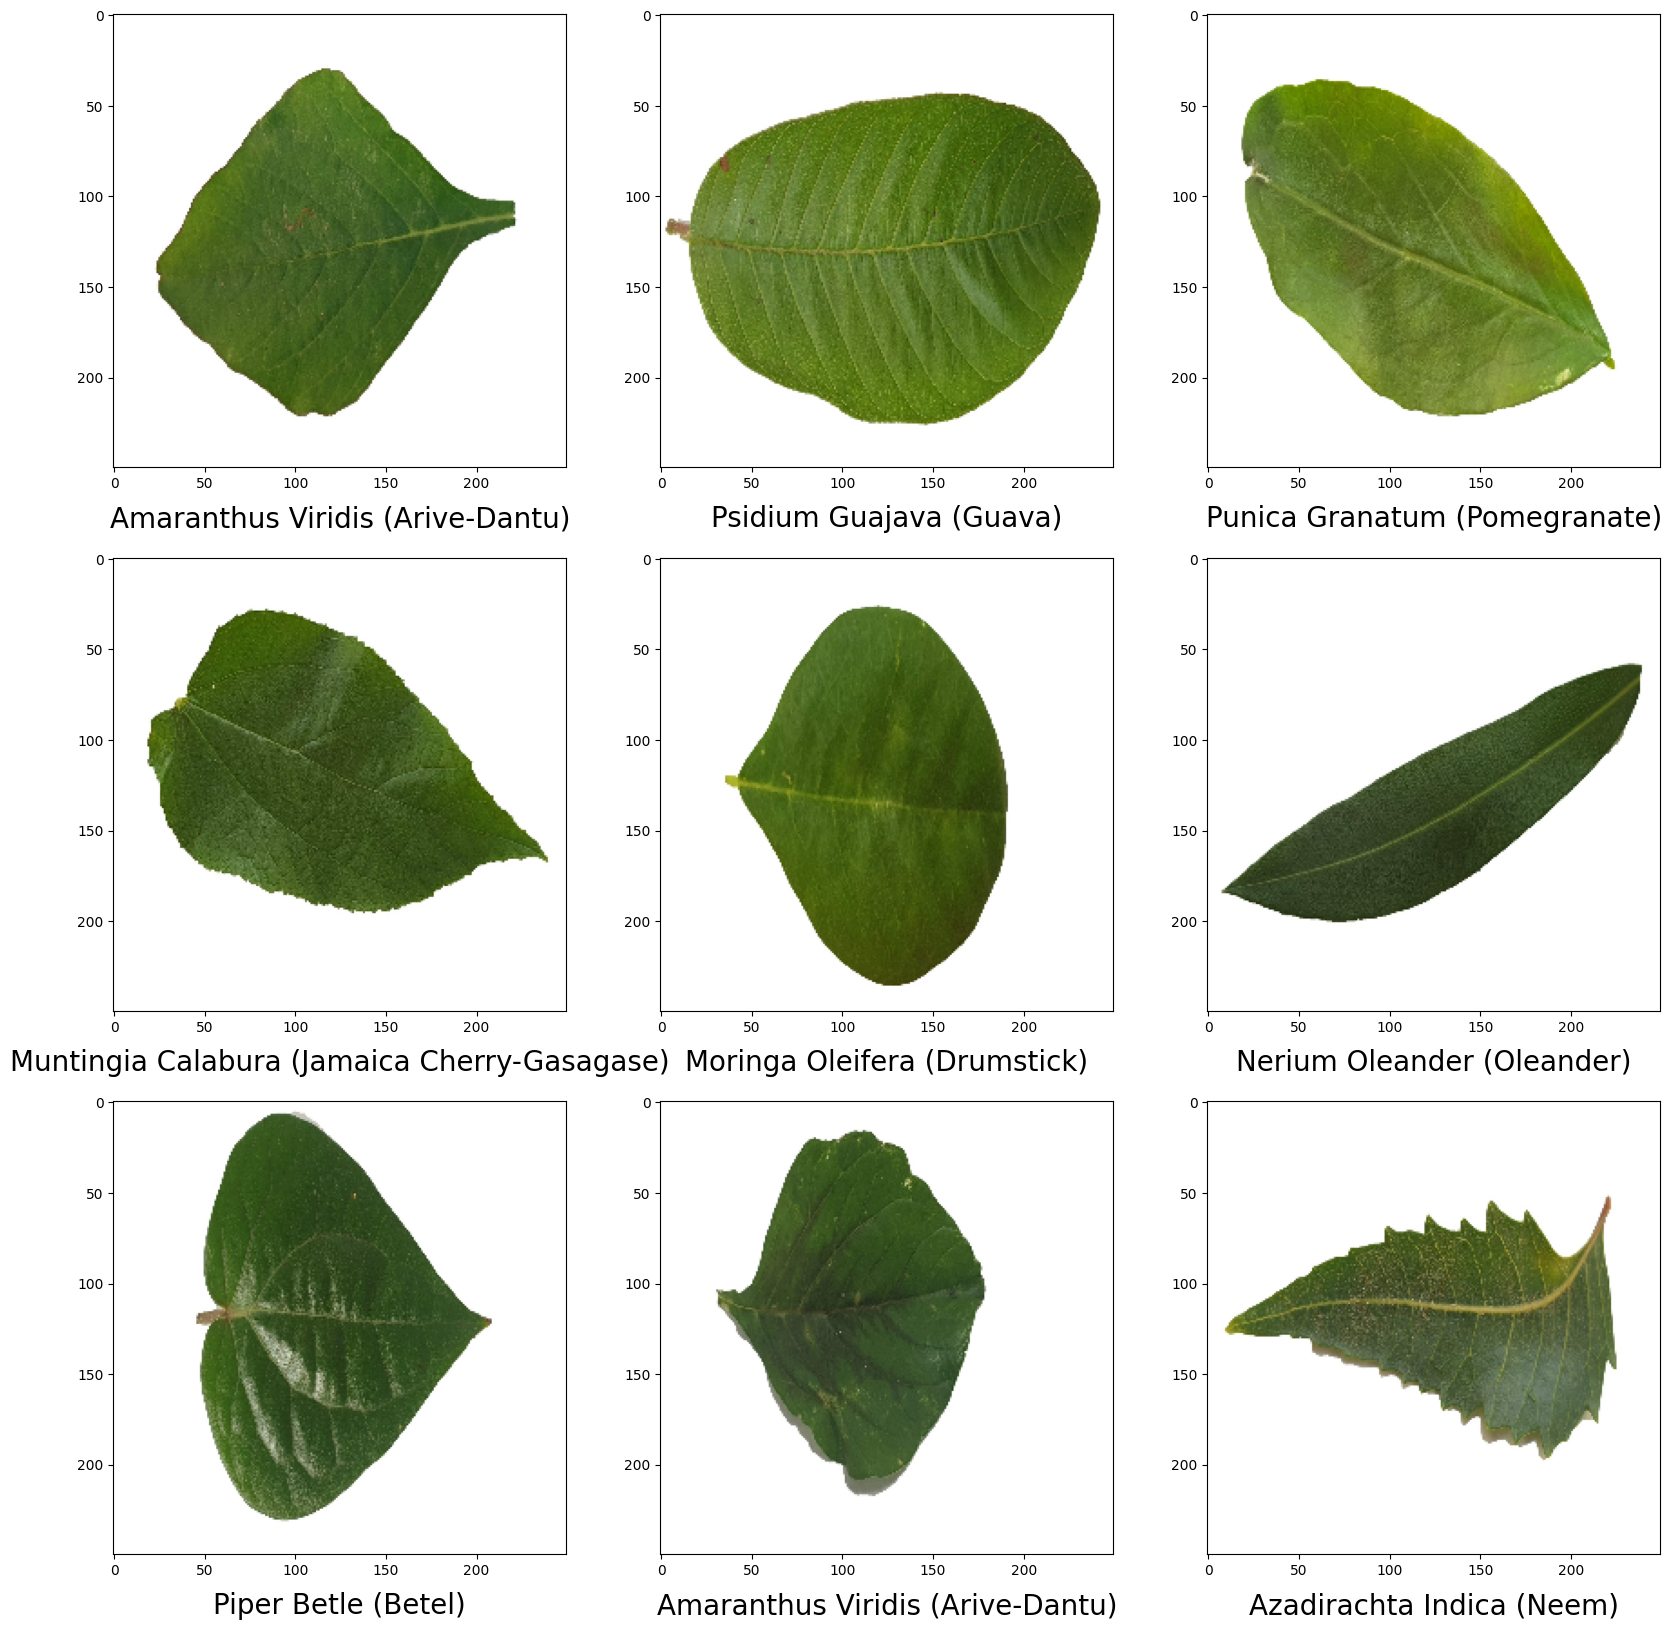

In [29]:
plt.figure(figsize=(20,20))

for image, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_class[labels[i]], fontsize=20, y=-0.15) 
        plt.axis('on')


## MODEL TRAINING

In [30]:
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(250, 250, 3)))


model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(30, activation='softmax'))


e:\conda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 250, 250, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    14,746,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        15,390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,002,334 (57.23 MB)

 Trainable params: 15,002,334 (57.23 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history=model.fit(train_dataset,validation_data=validation_dataset,epochs=10,batch_size=32)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 993ms/step - accuracy: 0.9353 - loss: 0.2043 - val_accuracy: 0.8263 - val_loss: 0.6346
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 44s 960ms/step - accuracy: 0.9318 - loss: 0.2117 - val_accuracy: 0.8158 - val_loss: 0.6754
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 45s 986ms/step - accuracy: 0.9323 - loss: 0.2059 - val_accuracy: 0.8526 - val_loss: 0.5816
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9539 - loss: 0.1277 - val_accuracy: 0.8553 - val_loss: 0.7310
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9636 - loss: 0.1119 - val_accuracy: 0.8474 - val_loss: 0.7544
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9514 - loss: 0.1636 - val_accuracy: 0.8289 - val_loss: 0.7549
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 990ms/step - accuracy: 0.9706 - loss: 0.1064 - val_accuracy: 0.8526 - val_loss: 0.6651
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9603 - loss: 0.1262 - val_accuracy: 0.8316

## ACCURACY AND LOSSPLOT

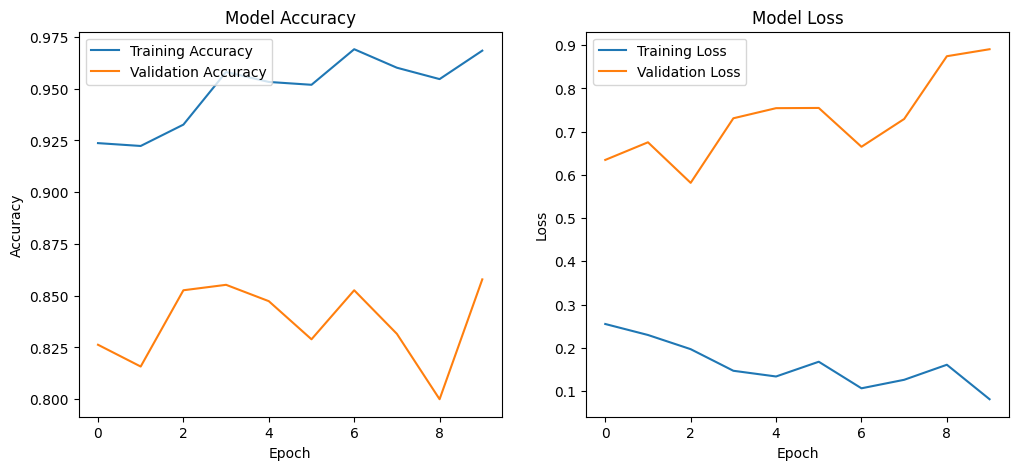

In [34]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

In [35]:

train_accuracy = history.history['accuracy'][-1]  
val_accuracy = history.history['val_accuracy'][-1]  

print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")


Final Training Accuracy: 96.84%
Final Validation Accuracy: 85.79%


In [36]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 506ms/step - accuracy: 0.8848 - loss: 0.6500
Test Accuracy: 85.79%


## PREDICTION

In [50]:
img = "mint.jpg"
im = tf.keras.utils.load_img(img, target_size=(img_size, img_size))
img_arr = tf.keras.utils.img_to_array(im)  
img_bat = tf.expand_dims(img_arr, axis=0)
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [51]:
print('It\'s a {} with accuracy {:0.2f}%'.format(data_class[np.argmax(score)], np.max(score) * 1000))

It's a Mentha (Mint) with accuracy 85.70%
